In [1]:
# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data
ratings = pd.read_csv("../data/raw/ratings.csv")
movies = pd.read_csv("../data/raw/movies.csv")

print("Ratings shape:", ratings.shape)
print("Movies shape:", movies.shape)

ratings.head()


Ratings shape: (100000, 4)
Movies shape: (1682, 3)


,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
ratings.info()
ratings.describe()
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100000 non-null  int64
 1   movieId    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieId       1682 non-null   int64 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
dtypes: int64(1), object(2)
memory usage: 39.6+ KB


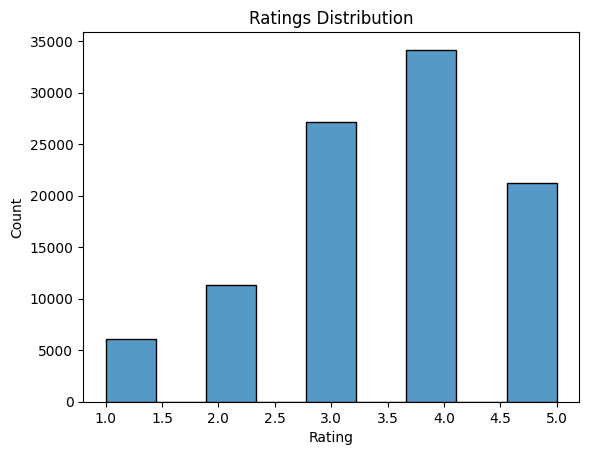

In [3]:
sns.histplot(ratings["rating"], bins=9, kde=False)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Unique users: 943
Unique movies: 1682


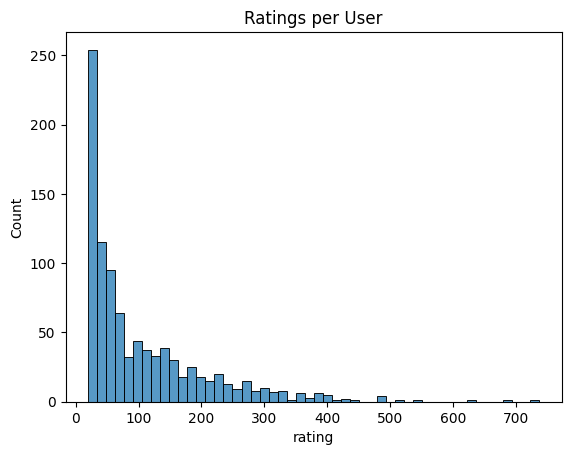

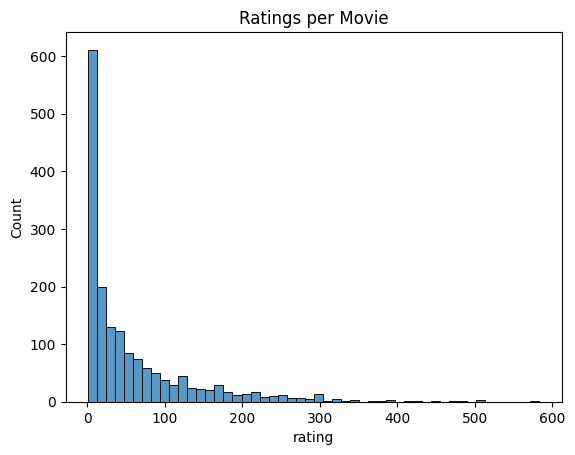

In [4]:
num_users = ratings["userId"].nunique()
num_movies = ratings["movieId"].nunique()

print(f"Unique users: {num_users}")
print(f"Unique movies: {num_movies}")

# Ratings per user
ratings_per_user = ratings.groupby("userId")["rating"].count()
sns.histplot(ratings_per_user, bins=50)
plt.title("Ratings per User")
plt.show()

# Ratings per movie
ratings_per_movie = ratings.groupby("movieId")["rating"].count()
sns.histplot(ratings_per_movie, bins=50)
plt.title("Ratings per Movie")
plt.show()


In [5]:
sparsity = 1 - (len(ratings) / (num_users * num_movies))
print(f"Matrix Sparsity: {sparsity:.2%}")


Matrix Sparsity: 93.70%
